In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from keras.preprocessing import image

Using TensorFlow backend.


In [2]:
train_rock_dir = os.path.join("E:/project/rps train/rock/a")
train_paper_dir = os.path.join("E:/project/rps train/paper/b")
train_scissors_dir = os.path.join("E:/project/rps train/scissors/c")

train_rock_names  = os.listdir(train_rock_dir)
train_paper_names  = os.listdir(train_paper_dir)
train_scissors_names  = os.listdir(train_scissors_dir)

print(train_rock_names[:10])
print(train_paper_names[:10])
print(train_scissors_names[:10])

['rock01-000.png', 'rock01-001.png', 'rock01-002.png', 'rock01-003.png', 'rock01-004.png', 'rock01-005.png', 'rock01-006.png', 'rock01-007.png', 'rock01-008.png', 'rock01-009.png']
['paper01-000.png', 'paper01-001.png', 'paper01-002.png', 'paper01-003.png', 'paper01-004.png', 'paper01-005.png', 'paper01-006.png', 'paper01-007.png', 'paper01-008.png', 'paper01-009.png']
['scissors01-000.png', 'scissors01-001.png', 'scissors01-002.png', 'scissors01-003.png', 'scissors01-004.png', 'scissors01-005.png', 'scissors01-006.png', 'scissors01-007.png', 'scissors01-008.png', 'scissors01-009.png']


In [3]:
print('total rock images:' , len(train_rock_names))
print('total paper images:' , len(train_paper_names))
print('total scissors images:' , len(train_scissors_names))

total rock images: 840
total paper images: 840
total scissors images: 840


In [4]:
DESIRED_ACCURACY = 0.99

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>DESIRED_ACCURACY):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3), activation  = 'relu', input_shape  = (128,128,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3), activation  = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation= 'relu'),
    tf.keras.layers.Dense(3, activation= 'softmax')
])

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        36928     
__________

In [7]:
model.compile(loss = 'categorical_crossentropy',
             optimizer  = 'adam',
             metrics = ['acc'])

In [8]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen  = ImageDataGenerator(rescale = 1./255,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip= True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_gen = train_datagen.flow_from_directory('E:/project/rps train',
                                             target_size=(128,128),
                                             batch_size=32,
                                             class_mode='categorical')

test_gen = test_datagen.flow_from_directory('E:/project/rps-test-set',
                                             target_size=(128,128),
                                             batch_size=32,
                                             class_mode='categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [9]:
model.fit_generator(train_gen,
                         steps_per_epoch = 100,
                         epochs = 34, 
                        validation_data = test_gen,
                         verbose = 1,
                        callbacks=[callbacks])

Instructions for updating:
Use tf.cast instead.
Epoch 1/34
79/79 [==============================] - 55s 699ms/step - loss: 0.6845 - acc: 0.6627 - val_loss: 0.2387 - val_acc: 0.9247
Epoch 2/34
79/79 [==============================] - 59s 743ms/step - loss: 0.1353 - acc: 0.9579 - val_loss: 0.2911 - val_acc: 0.8763
Epoch 3/34
79/79 [==============================] - 55s 693ms/step - loss: 0.0441 - acc: 0.9853 - val_loss: 0.0825 - val_acc: 0.9489
Epoch 4/34
12/12 [==============================] - 4s 313ms/step - loss: 0.2147 - acc: 0.9328

Reached 99.9% accuracy so cancelling training!
79/79 [==============================] - 54s 687ms/step - loss: 0.0309 - acc: 0.9905 - val_loss: 0.2147 - val_acc: 0.9328


In [10]:
from keras.preprocessing import image
test_image = image.load_img('E:/sc/hand.jpg', target_size = (128, 128))

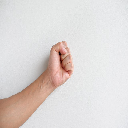

In [11]:
test_image

In [12]:
test_image = image.img_to_array(test_image)

In [13]:
test_image = np.expand_dims(test_image, axis = 0)

In [14]:
result = model.predict(test_image)
if result[0][0] == 1:
    prediction = 'paper'
elif result[0][1] == 1:
    prediction = 'rock'
else:
    prediction = 'scissors'
print(result)
print('The image you entered is', prediction, '.')

[[0. 1. 0.]]
The image you entered is rock .
